In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as K

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
from keras.utils import to_categorical

In [5]:
print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

# Find the unique numbers from the train labels
classes = np.unique(y_train)
num_classes = len(classes)
print('Total number of outputs : ', num_classes)
print('Output classes : ', num_classes)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  10


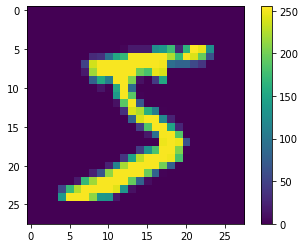

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [97]:
def create_model():
    model = Sequential()

    model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=input_shape,name="conv_1"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(32, activation='relu',name="dense_1"))
    model.add(Dense(num_classes, activation='softmax',name="dense_2"))
    
    return model

model1=create_model()

model1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                100384    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 100,874
Trainable params: 100,874
Non-trainable params: 0
_________________________________________________________________


In [98]:
batch_size_1= 64
epochs = 20

adam = keras.optimizers.Adam(lr=0.001)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  

In [99]:
history1=model1.fit(x_train,y_train,batch_size=batch_size_1,epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/20
938/938 [==============================] - 6s 6ms/step - loss: 0.5309 - accuracy: 0.8436 - val_loss: 0.1418 - val_accuracy: 0.9580
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1182 - accuracy: 0.9661 - val_loss: 0.0929 - val_accuracy: 0.9731
Epoch 3/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0745 - accuracy: 0.9782 - val_loss: 0.0706 - val_accuracy: 0.9780
Epoch 4/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0583 - accuracy: 0.9825 - val_loss: 0.0653 - val_accuracy: 0.9796
Epoch 5/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0462 - accuracy: 0.9863 - val_loss: 0.0628 - val_accuracy: 0.9801
Epoch 6/20
938/938 [==============================] - 6s 7ms/step - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.0529 - val_accuracy: 0.9834
Epoch 7/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0333 - accuracy: 0.9900 - val_loss: 0.0590 - val_accuracy: 0.9794
Epoch 

In [100]:
layer1_weights_model1,layer1_bias_model1=model1.get_layer('conv_1').get_weights()
layer2_weights_model1,layer2_bias_model1=model1.get_layer('dense_1').get_weights()
layer3_weights_model1,layer3_bias_model1=model1.get_layer('dense_2').get_weights()

print(layer1_weights_model1.shape)
print(layer1_weights_model1)

m1_w1=layer1_weights_model1
m1_w2=layer2_weights_model1
m1_w3=layer3_weights_model1

m1_b1=layer1_bias_model1
m1_b2=layer2_bias_model1
m1_b3=layer3_bias_model1

(3, 3, 1, 16)
[[[[ 0.32553285  0.15670078  0.2701332  -0.81236875 -0.14965548
     0.07212121 -0.79106426  0.51797885  0.13347581 -0.15478715
     0.3418434   0.2690813  -0.26040906  0.2886684  -0.35382107
     0.7760751 ]]

  [[ 0.43115753  0.0453255   0.764856    0.17085187  0.31288448
     0.19286606 -1.1833717  -1.0493578  -0.1541571   0.27538967
    -0.28908902  0.41286996  0.16790642 -0.02497534 -0.49884763
     0.453421  ]]

  [[-0.18632747 -0.29435158  0.41766414  0.38797364 -0.4216733
    -0.10788188 -0.9504175   0.5059524  -0.01167514  0.09341205
     0.1965922   0.5518737   0.13129234 -0.9500343   0.10704409
    -1.0837033 ]]]


 [[[ 0.48140463  0.2888338  -0.77527195  0.32166365  0.2619858
     0.09003017 -0.9862138   0.31046915  0.1067645   0.16502273
     0.272103    0.12224941 -0.11849818  0.70548576  0.27747023
     0.61677575]]

  [[-0.10411154  0.6102016   0.3489173   0.23400874  0.43061775
     0.21933614  0.30546284 -1.0052916   0.2052139   0.00551396
    -0.5162698

In [101]:
model2=create_model()

model2.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                100384    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 100,874
Trainable params: 100,874
Non-trainable params: 0
_________________________________________________________________


In [102]:
batch_size_2= 1024
epochs = 20

adam = keras.optimizers.Adam(lr=0.001)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2=model2.fit(x_train,y_train,batch_size=batch_size_2,epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/20
59/59 [==============================] - 5s 84ms/step - loss: 1.5097 - accuracy: 0.6075 - val_loss: 0.3469 - val_accuracy: 0.8972
Epoch 2/20
59/59 [==============================] - 5s 77ms/step - loss: 0.3233 - accuracy: 0.9057 - val_loss: 0.2570 - val_accuracy: 0.9250
Epoch 3/20
59/59 [==============================] - 5s 80ms/step - loss: 0.2515 - accuracy: 0.9284 - val_loss: 0.2079 - val_accuracy: 0.9408
Epoch 4/20
59/59 [==============================] - 5s 84ms/step - loss: 0.2088 - accuracy: 0.9388 - val_loss: 0.1742 - val_accuracy: 0.9502
Epoch 5/20
59/59 [==============================] - 5s 84ms/step - loss: 0.1770 - accuracy: 0.9493 - val_loss: 0.1463 - val_accuracy: 0.9569
Epoch 6/20
59/59 [==============================] - 5s 80ms/step - loss: 0.1464 - accuracy: 0.9589 - val_loss: 0.1270 - val_accuracy: 0.9639
Epoch 7/20
59/59 [==============================] - 5s 77ms/step - loss: 0.1275 - accuracy: 0.9639 - val_loss: 0.1121 - val_accuracy: 0.9681
Epoch 8/20
59

In [103]:
layer1_weights_model2,layer1_bias_model2=model2.get_layer('conv_1').get_weights()
layer2_weights_model2,layer2_bias_model2=model2.get_layer('dense_1').get_weights()
layer3_weights_model2,layer3_bias_model2=model2.get_layer('dense_2').get_weights()

print(layer1_weights_model2.shape)
print(layer1_weights_model2)

m2_w1=layer1_weights_model2
m2_w2=layer2_weights_model2
m2_w3=layer3_weights_model2

m2_b1=layer1_bias_model2
m2_b2=layer2_bias_model2
m2_b3=layer3_bias_model2

(3, 3, 1, 16)
[[[[-1.52500167e-01  2.44470358e-01  3.67380828e-02  2.60239094e-01
    -2.56090853e-02 -4.82743561e-01  1.05437018e-01 -4.54255417e-02
    -7.62057751e-02 -3.62508111e-02  2.93902755e-01  1.70563549e-01
    -4.11382467e-01  2.91700393e-01 -4.50751603e-01  4.08192687e-02]]

  [[ 1.01421654e-01 -7.43624344e-02  3.86488549e-02  3.74696404e-02
     9.15318504e-02  3.39695930e-01  6.94137141e-02  1.20390438e-01
     3.73263694e-02 -3.01906951e-02  4.11507249e-01 -3.71863171e-02
    -3.00711185e-01  4.32838015e-02 -4.93641496e-01  3.21303427e-01]]

  [[ 1.40728951e-01  1.97158813e-01  1.23104364e-01  2.32751593e-01
     2.45486945e-01  9.86754894e-02  1.50601655e-01  9.55201387e-02
     1.47887290e-01  1.96816549e-01  4.14440721e-01 -3.48905712e-01
     1.89478517e-01 -2.78496623e-01  2.12951466e-01  3.55268002e-01]]]


 [[[ 2.74959952e-01  1.39896780e-01  6.74349144e-02 -1.41787514e-01
    -2.81513691e-01 -3.48326683e-01 -1.02861151e-01  2.28883445e-01
     3.11681867e-01  1.

In [104]:
alpha1 = -1.0

m3_w1=(1-alpha1)*m1_w1+alpha1*m2_w1
m3_w2=(1-alpha1)*m1_w2+alpha1*m2_w2
m3_w3=(1-alpha1)*m1_w3+alpha1*m2_w3

m3_b1=(1-alpha1)*m1_b1+alpha1*m2_b1
m3_b2=(1-alpha1)*m1_b2+alpha1*m2_b2
m3_b3=(1-alpha1)*m1_b3+alpha1*m2_b3

print(m3_w1.shape)
print(m3_b1.shape)
print(m3_w1)
print(m3_b1)

(3, 3, 1, 16)
(16,)
[[[[ 8.03565860e-01  6.89311922e-02  5.03528297e-01 -1.88497663e+00
    -2.73701876e-01  6.26985967e-01 -1.68756557e+00  1.08138323e+00
     3.43157411e-01 -2.73323506e-01  3.89784038e-01  3.67599040e-01
    -1.09435648e-01  2.85636395e-01 -2.56890535e-01  1.51133096e+00]]

  [[ 7.60893404e-01  1.65013433e-01  1.49106312e+00  3.04234087e-01
     5.34237087e-01  4.60361838e-02 -2.43615699e+00 -2.21910596e+00
    -3.45640570e-01  5.80970049e-01 -9.89685297e-01  8.62926245e-01
     6.36524022e-01 -9.32344794e-02 -5.04053771e-01  5.85538566e-01]]

  [[-5.13383865e-01 -7.85861969e-01  7.12223887e-01  5.43195665e-01
    -1.08883357e+00 -3.14439237e-01 -2.05143666e+00  9.16384697e-01
    -1.71237573e-01 -9.99245048e-03 -2.12563276e-02  1.45265305e+00
     7.31061697e-02 -1.62157202e+00  1.13670528e-03 -2.52267456e+00]]]


 [[[ 6.87849283e-01  4.37770814e-01 -1.61797881e+00  7.85114825e-01
     8.05485308e-01  5.28387010e-01 -1.86956644e+00  3.92054856e-01
    -9.81528610e-

In [106]:
W1_m3=[]
W2_m3=[]
W3_m3=[]

m3_w1=np.array(m3_w1)
m3_w2=np.array(m3_w2)
m3_w3=np.array(m3_w3)
m3_b1=np.array(m3_b1)
m3_b2=np.array(m3_b2)
m3_b3=np.array(m3_b3)

W1_m3.append(m3_w1)
W2_m3.append(m3_w2)
W3_m3.append(m3_w3)
W1_m3.append(m3_b1)
W2_m3.append(m3_b2)
W3_m3.append(m3_b3)

model3=create_model()
model3.layers[0].set_weights(W1_m3)
model3.layers[3].set_weights(W2_m3)
model3.layers[4].set_weights(W3_m3)

In [107]:
for layer in model1.layers:
    print(layer.output_shape)

(None, 28, 28, 16)
(None, 14, 14, 16)
(None, 3136)
(None, 32)
(None, 10)


In [108]:
print(model3.layers[0].output_shape)
print(model3.layers[3].output_shape)
print(model3.layers[4].output_shape)

model3.summary()

(None, 28, 28, 16)
(None, 32)
(None, 10)
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                100384    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 100,874
Trainable params: 100,874
Non-trainable params: 0
_________________________________________________________________


In [109]:
adam = keras.optimizers.Adam(lr=0.001)
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history3=model3.fit(x_train,y_train,batch_size=256,epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/20
235/235 [==============================] - 7s 28ms/step - loss: 0.4059 - accuracy: 0.9805 - val_loss: 0.4689 - val_accuracy: 0.9804
Epoch 2/20
235/235 [==============================] - 6s 25ms/step - loss: 0.0354 - accuracy: 0.9963 - val_loss: 0.4286 - val_accuracy: 0.9823
Epoch 3/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0122 - accuracy: 0.9982 - val_loss: 0.4233 - val_accuracy: 0.9814
Epoch 4/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0056 - accuracy: 0.9988 - val_loss: 0.4164 - val_accuracy: 0.9820
Epoch 5/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.4141 - val_accuracy: 0.9817
Epoch 6/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.4141 - val_accuracy: 0.9815
Epoch 7/20
235/235 [==============================] - 6s 24ms/step - loss: 8.7544e-04 - accuracy: 0.9997 - val_loss: 0.4118 - val_accuracy: 0.

In [110]:
model3.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4252 - accuracy: 0.9838


[0.4251609742641449, 0.9837999939918518]

In [111]:
model3.evaluate(x_train, y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 4.6546e-04 - accuracy: 0.9999


[0.0004654575895983726, 0.9998833537101746]

In [125]:
alpha2 = -0.5

m4_w1=(1-alpha2)*m1_w1+alpha2*m2_w1
m4_w2=(1-alpha2)*m1_w2+alpha2*m2_w2
m4_w3=(1-alpha2)*m1_w3+alpha2*m2_w3

m4_b1=(1-alpha2)*m1_b1+alpha2*m2_b1
m4_b2=(1-alpha2)*m1_b2+alpha2*m2_b2
m4_b3=(1-alpha2)*m1_b3+alpha2*m2_b3

In [126]:
W1_m4=[]
W2_m4=[]
W3_m4=[]

m4_w1=np.array(m4_w1)
m4_w2=np.array(m4_w2)
m4_w3=np.array(m4_w3)
m4_b1=np.array(m4_b1)
m4_b2=np.array(m4_b2)
m4_b3=np.array(m4_b3)

W1_m4.append(m4_w1)
W2_m4.append(m4_w2)
W3_m4.append(m4_w3)
W1_m4.append(m4_b1)
W2_m4.append(m4_b2)
W3_m4.append(m4_b3)

model4=create_model()
model4.layers[0].set_weights(W1_m4)
model4.layers[3].set_weights(W2_m4)
model4.layers[4].set_weights(W3_m4)

In [127]:
print(model4.layers[0].output_shape)
print(model4.layers[3].output_shape)
print(model4.layers[4].output_shape)

model4.summary()

(None, 28, 28, 16)
(None, 32)
(None, 10)
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                100384    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 100,874
Trainable params: 100,874
Non-trainable params: 0
_________________________________________________________________


In [128]:
adam = keras.optimizers.Adam(lr=0.001)
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history4=model4.fit(x_train,y_train,batch_size=256,epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/20
235/235 [==============================] - 6s 22ms/step - loss: 0.0401 - accuracy: 0.9936 - val_loss: 0.1848 - val_accuracy: 0.9823
Epoch 2/20
235/235 [==============================] - 5s 23ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.1698 - val_accuracy: 0.9832
Epoch 3/20
235/235 [==============================] - 6s 27ms/step - loss: 7.7274e-04 - accuracy: 0.9998 - val_loss: 0.1715 - val_accuracy: 0.9842
Epoch 4/20
235/235 [==============================] - 6s 26ms/step - loss: 4.3702e-04 - accuracy: 0.9999 - val_loss: 0.1708 - val_accuracy: 0.9845
Epoch 5/20
235/235 [==============================] - 6s 26ms/step - loss: 4.7717e-04 - accuracy: 0.9997 - val_loss: 0.1723 - val_accuracy: 0.9838
Epoch 6/20
235/235 [==============================] - 6s 26ms/step - loss: 5.6591e-04 - accuracy: 0.9998 - val_loss: 0.1782 - val_accuracy: 0.9834
Epoch 7/20
235/235 [==============================] - 6s 25ms/step - loss: 7.1870e-04 - accuracy: 0.9997 - val_loss: 0.1713 - 

In [129]:
model4.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1805 - accuracy: 0.9844


[0.18052780628204346, 0.9843999743461609]

In [130]:
model4.evaluate(x_train, y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 4.4424e-06 - accuracy: 1.0000


[4.442395493242657e-06, 1.0]

In [134]:
alpha3 = 0.0

m5_w1=(1-alpha3)*m1_w1+alpha3*m2_w1
m5_w2=(1-alpha3)*m1_w2+alpha3*m2_w2
m5_w3=(1-alpha3)*m1_w3+alpha3*m2_w3

m5_b1=(1-alpha3)*m1_b1+alpha3*m2_b1
m5_b2=(1-alpha3)*m1_b2+alpha3*m2_b2
m5_b3=(1-alpha3)*m1_b3+alpha3*m2_b3

In [135]:
W1_m5=[]
W2_m5=[]
W3_m5=[]

m5_w1=np.array(m5_w1)
m5_w2=np.array(m5_w2)
m5_w3=np.array(m5_w3)
m5_b1=np.array(m5_b1)
m5_b2=np.array(m5_b2)
m5_b3=np.array(m5_b3)

W1_m5.append(m5_w1)
W2_m5.append(m5_w2)
W3_m5.append(m5_w3)
W1_m5.append(m5_b1)
W2_m5.append(m5_b2)
W3_m5.append(m5_b3)

model5=create_model()
model5.layers[0].set_weights(W1_m5)
model5.layers[3].set_weights(W2_m5)
model5.layers[4].set_weights(W3_m5)

In [136]:
adam = keras.optimizers.Adam(lr=0.001)
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history5=model5.fit(x_train,y_train,batch_size=256,epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/20
235/235 [==============================] - 7s 28ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0632 - val_accuracy: 0.9851
Epoch 2/20
235/235 [==============================] - 6s 24ms/step - loss: 9.5626e-04 - accuracy: 1.0000 - val_loss: 0.0692 - val_accuracy: 0.9847
Epoch 3/20
235/235 [==============================] - 6s 26ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.0660 - val_accuracy: 0.9848
Epoch 4/20
235/235 [==============================] - 6s 25ms/step - loss: 9.0496e-04 - accuracy: 1.0000 - val_loss: 0.0816 - val_accuracy: 0.9838
Epoch 5/20
235/235 [==============================] - 6s 25ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0665 - val_accuracy: 0.9847
Epoch 6/20
235/235 [==============================] - 6s 26ms/step - loss: 5.7287e-04 - accuracy: 1.0000 - val_loss: 0.0670 - val_accuracy: 0.9861
Epoch 7/20
235/235 [==============================] - 6s 26ms/step - loss: 3.3295e-04 - accuracy: 1.0000 - val_loss: 0.0663 - val_

In [137]:
model5.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.9857


[0.07926635444164276, 0.9857000112533569]

In [138]:
model5.evaluate(x_train, y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 4.8311e-05 - accuracy: 1.0000


[4.8310987040167674e-05, 1.0]

In [146]:
alpha4 = 0.5

m6_w1=(1-alpha4)*m1_w1+alpha4*m2_w1
m6_w2=(1-alpha4)*m1_w2+alpha4*m2_w2
m6_w3=(1-alpha4)*m1_w3+alpha4*m2_w3

m6_b1=(1-alpha4)*m1_b1+alpha4*m2_b1
m6_b2=(1-alpha4)*m1_b2+alpha4*m2_b2
m6_b3=(1-alpha4)*m1_b3+alpha4*m2_b3

In [147]:
W1_m6=[]
W2_m6=[]
W3_m6=[]

m6_w1=np.array(m6_w1)
m6_w2=np.array(m6_w2)
m6_w3=np.array(m6_w3)
m6_b1=np.array(m6_b1)
m6_b2=np.array(m6_b2)
m6_b3=np.array(m6_b3)

W1_m6.append(m6_w1)
W2_m6.append(m6_w2)
W3_m6.append(m6_w3)
W1_m6.append(m6_b1)
W2_m6.append(m6_b2)
W3_m6.append(m6_b3)

model6=create_model()
model6.layers[0].set_weights(W1_m6)
model6.layers[3].set_weights(W2_m6)
model6.layers[4].set_weights(W3_m6)

In [148]:
adam = keras.optimizers.Adam(lr=0.001)
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history6=model6.fit(x_train,y_train,batch_size=256,epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/20
235/235 [==============================] - 6s 23ms/step - loss: 0.3251 - accuracy: 0.9123 - val_loss: 0.0824 - val_accuracy: 0.9773
Epoch 2/20
235/235 [==============================] - 6s 25ms/step - loss: 0.0602 - accuracy: 0.9837 - val_loss: 0.0615 - val_accuracy: 0.9810
Epoch 3/20
235/235 [==============================] - 6s 26ms/step - loss: 0.0417 - accuracy: 0.9893 - val_loss: 0.0541 - val_accuracy: 0.9839
Epoch 4/20
235/235 [==============================] - 6s 25ms/step - loss: 0.0323 - accuracy: 0.9926 - val_loss: 0.0498 - val_accuracy: 0.9830
Epoch 5/20
235/235 [==============================] - 6s 26ms/step - loss: 0.0259 - accuracy: 0.9939 - val_loss: 0.0470 - val_accuracy: 0.9847
Epoch 6/20
235/235 [==============================] - 6s 26ms/step - loss: 0.0213 - accuracy: 0.9954 - val_loss: 0.0492 - val_accuracy: 0.9833
Epoch 7/20
235/235 [==============================] - 6s 25ms/step - loss: 0.0181 - accuracy: 0.9963 - val_loss: 0.0457 - val_accuracy: 0.9852

In [149]:
model6.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0491 - accuracy: 0.9859


[0.04909065365791321, 0.9858999848365784]

In [150]:
model6.evaluate(x_train, y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0021 - accuracy: 0.9999


[0.0021496114786714315, 0.9998999834060669]

In [157]:
alpha5 = 1.0

m7_w1=(1-alpha5)*m1_w1+alpha5*m2_w1
m7_w2=(1-alpha5)*m1_w2+alpha5*m2_w2
m7_w3=(1-alpha5)*m1_w3+alpha5*m2_w3

m7_b1=(1-alpha5)*m1_b1+alpha5*m2_b1
m7_b2=(1-alpha5)*m1_b2+alpha5*m2_b2
m7_b3=(1-alpha5)*m1_b3+alpha5*m2_b3

In [158]:
W1_m7=[]
W2_m7=[]
W3_m7=[]

m7_w1=np.array(m7_w1)
m7_w2=np.array(m7_w2)
m7_w3=np.array(m7_w3)
m7_b1=np.array(m7_b1)
m7_b2=np.array(m7_b2)
m7_b3=np.array(m7_b3)

W1_m7.append(m7_w1)
W2_m7.append(m7_w2)
W3_m7.append(m7_w3)
W1_m7.append(m7_b1)
W2_m7.append(m7_b2)
W3_m7.append(m7_b3)

model7=create_model()
model7.layers[0].set_weights(W1_m7)
model7.layers[3].set_weights(W2_m7)
model7.layers[4].set_weights(W3_m7)

In [159]:
adam = keras.optimizers.Adam(lr=0.001)
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history7=model7.fit(x_train,y_train,batch_size=256,epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/20
235/235 [==============================] - 6s 25ms/step - loss: 0.0538 - accuracy: 0.9843 - val_loss: 0.0552 - val_accuracy: 0.9815
Epoch 2/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0474 - accuracy: 0.9861 - val_loss: 0.0553 - val_accuracy: 0.9824
Epoch 3/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0426 - accuracy: 0.9871 - val_loss: 0.0555 - val_accuracy: 0.9818
Epoch 4/20
235/235 [==============================] - 6s 25ms/step - loss: 0.0375 - accuracy: 0.9895 - val_loss: 0.0550 - val_accuracy: 0.9825
Epoch 5/20
235/235 [==============================] - 6s 26ms/step - loss: 0.0359 - accuracy: 0.9896 - val_loss: 0.0548 - val_accuracy: 0.9813
Epoch 6/20
235/235 [==============================] - 6s 26ms/step - loss: 0.0334 - accuracy: 0.9903 - val_loss: 0.0550 - val_accuracy: 0.9827
Epoch 7/20
235/235 [==============================] - 6s 27ms/step - loss: 0.0267 - accuracy: 0.9925 - val_loss: 0.0517 - val_accuracy: 0.9830

In [160]:
model7.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0569 - accuracy: 0.9831


[0.05694104731082916, 0.9830999970436096]

In [161]:
model7.evaluate(x_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0092 - accuracy: 0.9976


[0.009225440211594105, 0.9975666403770447]

In [177]:
alpha6 = 1.5

m8_w1=(1-alpha6)*m1_w1+alpha6*m2_w1
m8_w2=(1-alpha6)*m1_w2+alpha6*m2_w2
m8_w3=(1-alpha6)*m1_w3+alpha6*m2_w3

m8_b1=(1-alpha6)*m1_b1+alpha6*m2_b1
m8_b2=(1-alpha6)*m1_b2+alpha6*m2_b2
m8_b3=(1-alpha6)*m1_b3+alpha6*m2_b3

In [178]:
W1_m8=[]
W2_m8=[]
W3_m8=[]

m8_w1=np.array(m8_w1)
m8_w2=np.array(m8_w2)
m8_w3=np.array(m8_w3)
m8_b1=np.array(m8_b1)
m8_b2=np.array(m8_b2)
m8_b3=np.array(m8_b3)

W1_m8.append(m8_w1)
W2_m8.append(m8_w2)
W3_m8.append(m8_w3)
W1_m8.append(m8_b1)
W2_m8.append(m8_b2)
W3_m8.append(m8_b3)

model8=create_model()
model8.layers[0].set_weights(W1_m8)
model8.layers[3].set_weights(W2_m8)
model8.layers[4].set_weights(W3_m8)

In [179]:
adam = keras.optimizers.Adam(lr=0.001)
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history8=model8.fit(x_train,y_train,batch_size=256,epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/20
235/235 [==============================] - 7s 27ms/step - loss: 3.2646 - accuracy: 0.8521 - val_loss: 0.1951 - val_accuracy: 0.9680
Epoch 2/20
235/235 [==============================] - 6s 26ms/step - loss: 0.1459 - accuracy: 0.9745 - val_loss: 0.1644 - val_accuracy: 0.9708
Epoch 3/20
235/235 [==============================] - 6s 27ms/step - loss: 0.1062 - accuracy: 0.9786 - val_loss: 0.1360 - val_accuracy: 0.9748
Epoch 4/20
235/235 [==============================] - 6s 26ms/step - loss: 0.0868 - accuracy: 0.9824 - val_loss: 0.1204 - val_accuracy: 0.9774
Epoch 5/20
235/235 [==============================] - 6s 26ms/step - loss: 0.0710 - accuracy: 0.9837 - val_loss: 0.1234 - val_accuracy: 0.9744
Epoch 6/20
235/235 [==============================] - 6s 26ms/step - loss: 0.0701 - accuracy: 0.9827 - val_loss: 0.1184 - val_accuracy: 0.9768
Epoch 7/20
235/235 [==============================] - 6s 27ms/step - loss: 0.0628 - accuracy: 0.9841 - val_loss: 0.1173 - val_accuracy: 0.9754

In [180]:
model8.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0989 - accuracy: 0.9758


[0.09890776127576828, 0.9757999777793884]

In [181]:
model8.evaluate(x_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0301 - accuracy: 0.9897


[0.03013252094388008, 0.9896666407585144]

In [188]:
from keras import backend as k

train_loss=[0.0004654575895983726,4.442395493242657e-06,4.8310987040167674e-05,
            0.0021496114786714315,0.009225440211594105,0.03013252094388008]
test_loss=[0.4251609742641449,0.18052780628204346,0.07926635444164276,
           0.04909065365791321,0.05694104731082916,0.09890776127576828]


alpha=[-1.0,-0.5,0.0,0.5,1.0,1.5]

train_acc=[0.9998833537101746,1.0,1.0,0.9998999834060669,
           0.9975666403770447,0.9896666407585144]
test_acc=[0.9837999939918518,0.9843999743461609,0.985700011253356990,
          0.9858999848365784,0.9830999970436096,0.9757999777793884]

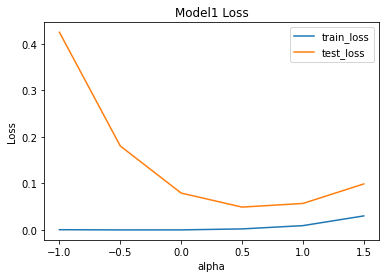

In [190]:
plt.plot(alpha,train_loss, label = 'train_loss')
plt.plot(alpha,test_loss, label = 'test_loss')
plt.title('Model1 Loss')
plt.ylabel('Loss')
plt.xlabel('alpha')
plt.legend()
plt.savefig("interpolation_loss.png")

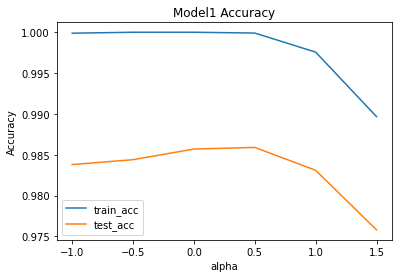

In [187]:
plt.plot(alpha,train_acc,label = 'train_acc')
plt.plot(alpha,test_acc,label = 'test_acc')
plt.title('Model1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('alpha')
plt.legend()
plt.savefig("interpolation_acc.png")